# Predicting survival rates of Titanic passengers

The dataset comprises of the following information about the passengers aboard the Titanic: 
<br>
1. PassengerId: Passenger identification number 
2. Survived: 0 indicates that the passenger did not survive and 1 indicates that the passenger did survive
3. Pclass: Passenger class- 1st, 2nd or 3rd
4. Name: Name of the passenger 
5. Sex: Male or female
6. Age of the Passenger 
7. SibSp: Number of Siblings or Spouses aboard
8. Parch: Number of Parents or children aboard 
9. Ticket: Ticket number 
10. Fare: Passenger fare 
11. Cabin: Cabin the passenger was in 
12. Embarked:  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [45]:
train = pd.read_csv('titanic_train.csv')

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

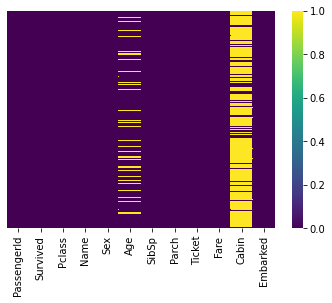

In [47]:
# heatmap to check for missing data
sns.heatmap(train.isnull(), yticklabels= False, cmap= 'viridis')

We can see that we're missing a lot of cabin information and some age information. The age column will be filled with a reasonable value(mean) based off the other age values. 

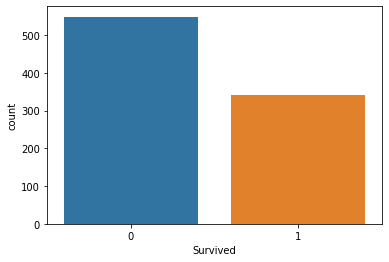

In [48]:
#survival count 
sns.countplot(x= 'Survived', data= train)

Looks like we have more deceased passengers than the ones who survived

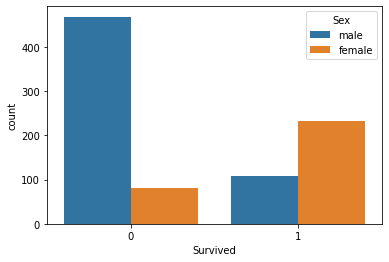

In [49]:
sns.countplot(x= 'Survived', data= train, hue='Sex')

Looks like most survivors were Female.

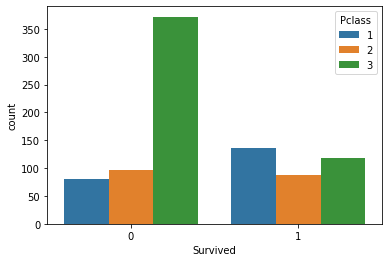

In [50]:
sns.countplot(x= 'Survived', data= train, hue='Pclass')

Looks like most people who did not survive belonged to the third class. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


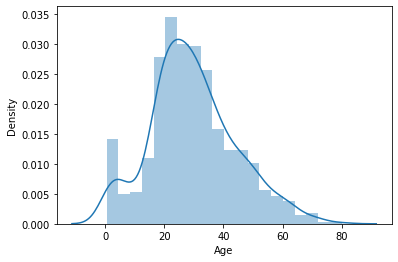

In [51]:
# looking at the age
sns.distplot(train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


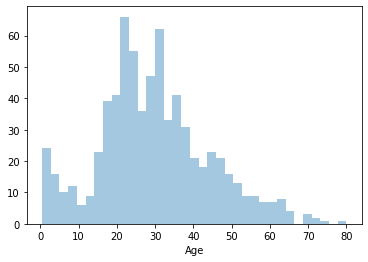

In [52]:
sns.distplot(train['Age'].dropna(), bins=35, kde= False)

Looks like a bimodal distribution. There are quite a few children(age: 0-10), average age is between 20 and 35, and as the passenger's age increases the lesser representation they have on board. 

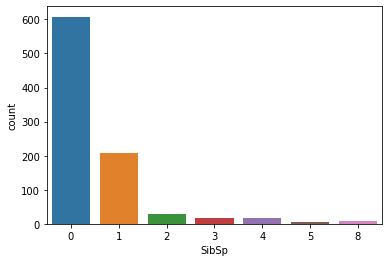

In [53]:
sns.countplot(x = 'SibSp', data= train)

Looks like a lot of people are travelling alone

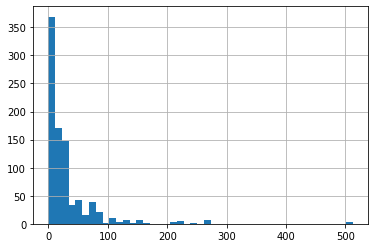

In [54]:
train['Fare'].hist(bins= 45)

Most fares are between 0 and 50. 

## Data Cleaning  

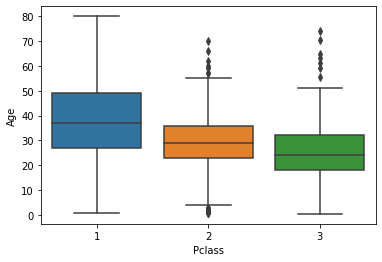

In [55]:
sns.boxplot(x='Pclass',y='Age', data=train)

Looks like the passengers in the first and second class are a bit older than the passengers in the third class. 

In [56]:
def impute_age(cols):
  Age= cols[0]
  Pclass = cols[1]
  
  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 28
    else: 
      return 25

  else: 
    return Age

In [57]:
train['Age']= train[['Age', 'Pclass']].apply(impute_age, axis=1)

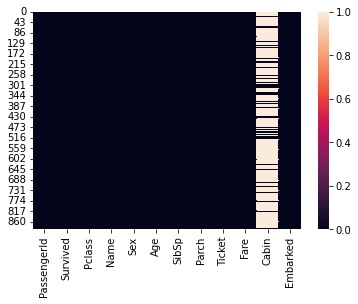

In [58]:
sns.heatmap(train.isnull())

We no longer have missing age. There's a lot of missing data in the cabin column and will hence drop the column. 

In [59]:
train.drop('Cabin', axis=1, inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


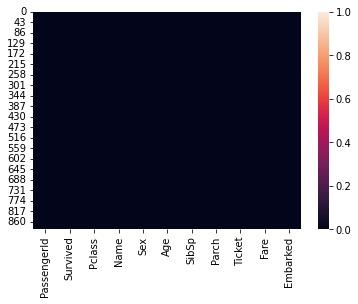

In [61]:
sns.heatmap(train.isnull())

No missing values!
We will now convert categorical values(Sex and Embarked column) into dummy variables. 

In [62]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Feeding both these values into our ML-model will result in the issue of multicollinearity. To solve this issue, we will drop of the columns above. 

In [63]:
sex= pd.get_dummies(train['Sex'], drop_first= True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [64]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [65]:
# concatenating embark and sex into train 
train = pd.concat([train, sex, embark], axis = 1)

In [66]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [67]:
# we will remove columns we dont really need 
train.drop(['Sex', 'Name', 'Embarked', 'Ticket'], axis= 1, inplace= True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [69]:
train.drop('PassengerId', axis=1, inplace= True)

In [70]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression Model 

In [73]:
#create matrix of features(X) and dependent variable vector(y)
X= train.iloc[:,1:]
y = train['Survived']

In [75]:
#creating training and test set
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

In [78]:
log_reg = LogisticRegression()

In [79]:
#fit the model
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [84]:
#predictions
pred = log_reg.predict(X_test)

In [85]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[153,  22],
       [ 32,  88]])

In [82]:
#model evaluation 
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

